In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
Admission = pd.read_csv('/content/admission.csv')

In [3]:
Admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
Admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
Admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
Admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
Admission.shape

(500, 9)

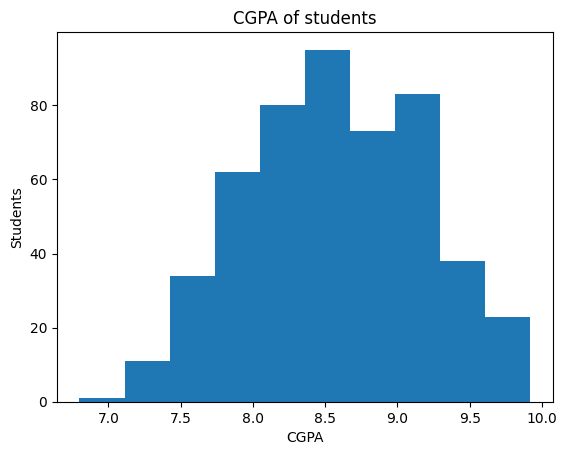

In [11]:
plt.hist(Admission['CGPA'], bins=10)
plt. xlabel('CGPA')
plt.ylabel('Students')
plt. title('CGPA of students')
plt.show()

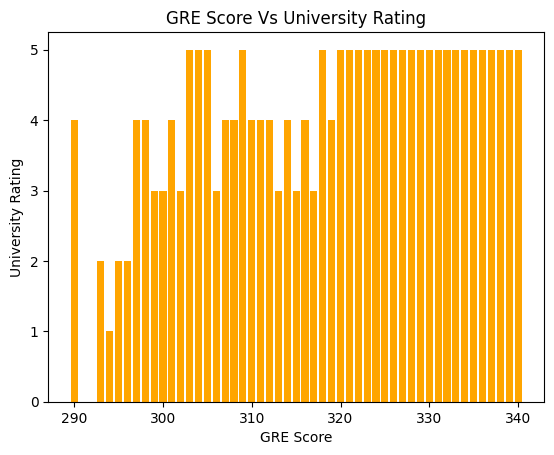

In [12]:
plt.bar(Admission['GRE Score'], Admission['University Rating'], color='orange')

plt. xlabel('GRE Score')

plt.ylabel('University Rating')

plt. title('GRE Score Vs University Rating')

plt.show()

In [14]:
Admission. loc[Admission['Chance of Admit '] < 0.8, 'Chance of Admit'] = 0
Admission.loc[Admission[ 'Chance of Admit '] >= 0.8, 'Chance of Admit'] = 1

In [16]:
Admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.0


In [18]:
X=Admission[['GRE Score','CGPA']]
y=Admission['Chance of Admit']

In [19]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.75,random_state=123)

In [21]:
X_train.head()

,GRE Score,CGPA
303,323,8.55
193,336,9.53
456,299,7.88
116,299,8.62
355,317,8.12


In [22]:
y_test.head()

229    1.0
337    1.0
327    0.0
416    0.0
306    0.0
Name: Chance of Admit, dtype: float64

In [23]:
classifier=DecisionTreeClassifier()

In [24]:
classifier=classifier.fit(X_train,y_train)

In [25]:
y_predict=classifier.predict(X_test)
y_predict

array([0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0.

In [26]:
import sklearn.metrics as metrics

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predict)
confusion_matrix

array([[214,  46],
       [ 17,  98]])

In [28]:
accuracy = metrics.accuracy_score(y_test,y_predict)

precision = metrics.precision_score(y_test,y_predict)

recall = metrics.recall_score(y_test,y_predict)

f1_score = metrics.f1_score (y_test,y_predict)


print("Accuracy:" ,accuracy)
print("Precision:" ,precision)
print("Recall:",recall)
print("f1 score:",f1_score)

Accuracy: 0.832
Precision: 0.6805555555555556
Recall: 0.8521739130434782
f1 score: 0.7567567567567568


In [29]:
pip install graphviz

In [30]:
export_graphviz(classifier, out_file="tree.dot", feature_names=Admission.feature_names, class_names=Admission.target_names, filled=True, rounded=True)

NameError: name 'export_graphviz' is not defined

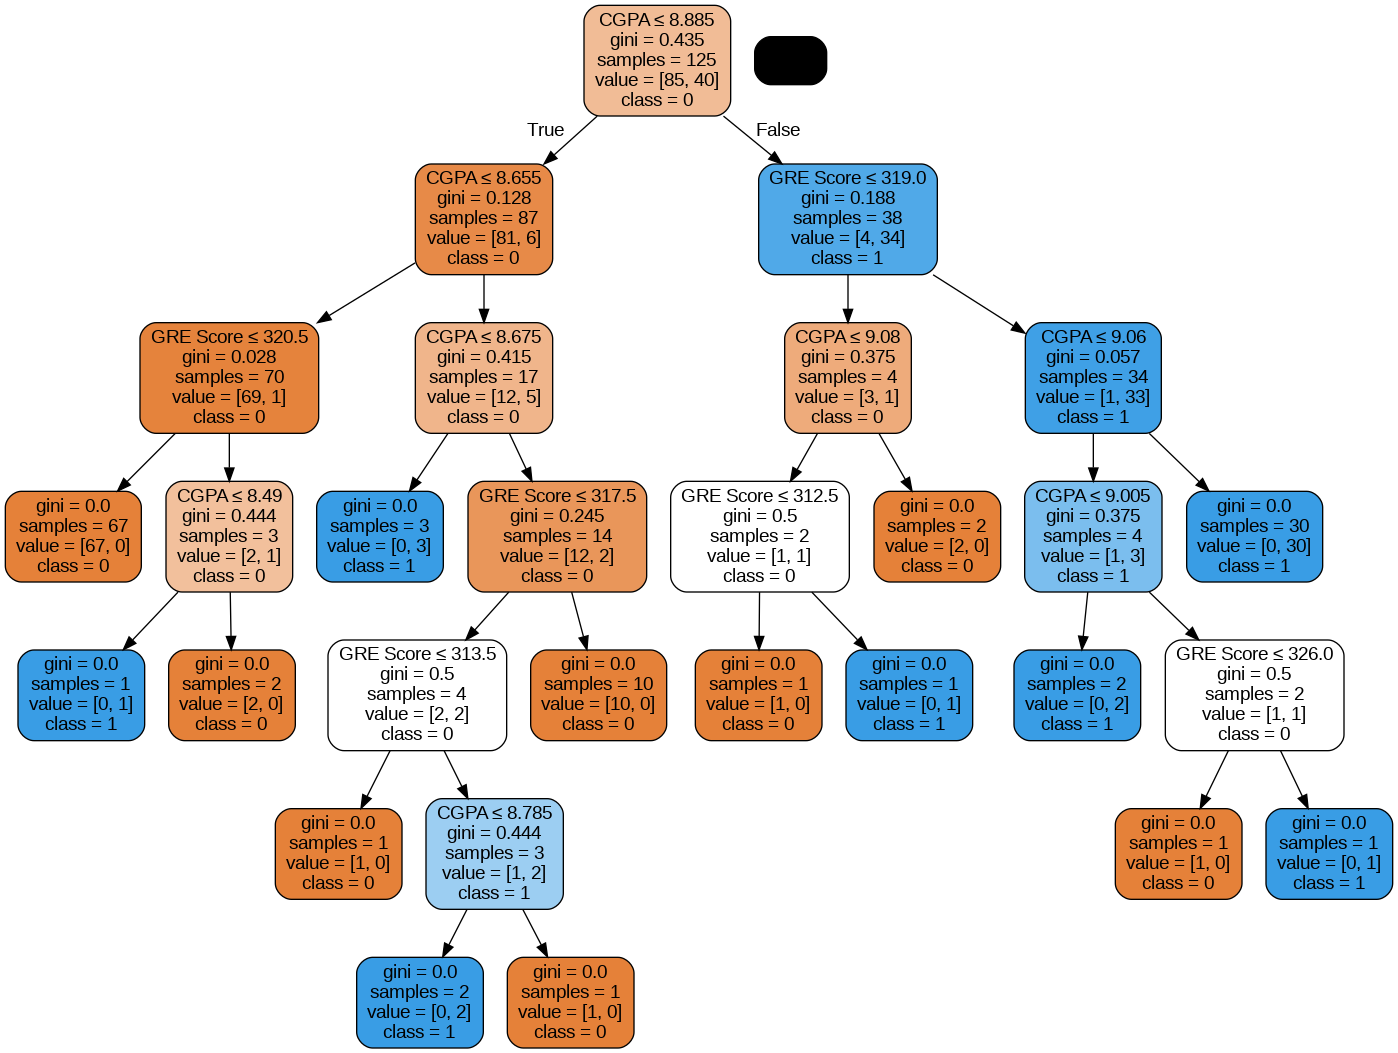

In [31]:
# Import necessary libraries
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the decision tree
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
